# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/Documents/MIDS/w207_sections_3_James_Nguyen/Projects/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

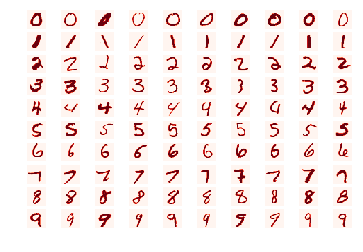

In [3]:
def P1(num_examples=10):
            
### STUDENT START ###
    
    digit_list = np.unique(Y)
    for i in digit_list:
        samples = X[Y==i]
        j =np.random.choice(samples.shape[0], size =num_examples, replace =False)
        X_img = samples[j].reshape(-1,28,28)
        for k in range(0,num_examples):
            plt.subplot(10,num_examples,i*num_examples +k+1)
            plt.imshow(X_img[k], cmap='Reds')
            plt.axis('off')


### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [6]:
def P2(k_values):
   
    ### STUDENT START ###

    accuracy =[]
    for k in k_values:
        kn = KNeighborsClassifier(n_neighbors =k)
        kn.fit(mini_train_data, mini_train_labels)
        dev_labels_pred = kn.predict(dev_data)
        accuracy.append(kn.score(dev_data, dev_labels))
        if k==1:
            print('Classification report when K=1')
            print(classification_report(dev_labels, dev_labels_pred))


    print('Accuracy output for the input k values: ',k_values,' : \n', accuracy)

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]


P2(k_values)

Classification report when K=1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy output for the input k values:  [1, 3, 5, 7, 9]  : 
 [0.88800000000000001, 0.878, 0.86899999999999999, 0.86499999999999999, 0.86299999999999999]


ANSWER: From the table for K=1, the lowest f1-score is number 9 with just 0.80 value so it seems number 9 is the most difficult to predict in overall. It has low precision and recall scores.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [7]:
def P3(train_sizes, accuracies):
    
    ### STUDENT START ###
    for size in train_sizes:
        start_time = time.time()
        new_train_data, new_train_labels = X[:size], Y[:size]
        kn = KNeighborsClassifier(n_neighbors =1)
        kn.fit(new_train_data, new_train_labels)
        end_time = time.time()
        duration = end_time - start_time
        accuracies.append((duration,kn.score(dev_data, dev_labels)))
        end_time = time.time()
        duration = end_time - start_time
        



### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)
for  size, i in zip(train_sizes, np.arange(len(train_sizes))):
    print('Size {:5d}, execution time {:5.2f} Accuracy {:4.2f} '.format(size,accuracies[i][0], accuracies[i][1]))



Size   100, execution time  0.00 Accuracy 0.72 
Size   200, execution time  0.00 Accuracy 0.79 
Size   400, execution time  0.00 Accuracy 0.84 
Size   800, execution time  0.01 Accuracy 0.88 
Size  1600, execution time  0.04 Accuracy 0.90 
Size  3200, execution time  0.11 Accuracy 0.93 
Size  6400, execution time  0.49 Accuracy 0.94 
Size 12800, execution time  1.59 Accuracy 0.96 
Size 25000, execution time  6.86 Accuracy 0.97 


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [8]:
def P4():
    
    def step_func(x):
        k=0
        if x>0.7:
            k= 1
        elif x>0.5:
            k= 0.5
        else:
            k=0
        return k
    vd_func = np.vectorize(step_func)


### STUDENT START ###
    ##prediction before transformation
    reg_model = LinearRegression(normalize = True)
    reg_model.fit(train_data, train_labels)
    print('Prediction before transformation for n=60000: {:3.2f} '.format(reg_model.predict(X[60000].reshape(1,-1))[0]))
    print('True value of y: {:2.0f} '.format(Y[60000]))



    reg_model = LinearRegression(normalize = True)
    transformed_train_data = vd_func(train_data)
    transformed_test_data = vd_func(X[60000])
    reg_model.fit(transformed_train_data, train_labels)
    print('Prediction after transformation for n=60000: {:3.2f} '.format(reg_model.predict(transformed_test_data.reshape(1,-1))[0]))
    print('True value of y: {:2.0f} '.format(Y[60000]))


### STUDENT END ###
P4()


Prediction before transformation for n=60000: 4.92 
True value of y:  4 
Prediction after transformation for n=60000: 4.34 
True value of y:  4 


ANSWER: The 10 digits are not linearly seperatable when plotting their pixel on the axes. So using linear regression is very inefficient.
To make improve the linear regression model, I've applied a simple step transformation for the data so that we reduce the dependencies on the pixel value magnitude which is not as predictive as the position of pixel. In this case, the accuracy for the particular number is improved a little bit which is closer to the true label value.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
The index of the most confused pair in the matrix is: (4,9) 
The classifier think this value is 9 but in fact, the true label is 4 and below are a few of the images 


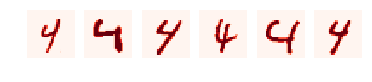

In [9]:
def P5():
### STUDENT START ###
    ### train the classifier 
    knn_1 = KNeighborsClassifier(n_neighbors =1)
    knn_1.fit(mini_train_data, mini_train_labels)
    dev_labels_pred = knn_1.predict(dev_data)
    confmat = confusion_matrix(dev_labels, dev_labels_pred, labels =[0,1,2,3,4,5,6,7,8,9])
    print(confmat)
    
    ### find the most confused pair in the matrix (which has largest value in the non-diagonal path) and store the index 
    
    
    n,n1_max,n2_max=0,0,0
    
    for n1 in np.arange(0,len(confmat[0])):
        for n2 in np.arange(0,len(confmat[1])):
            if((confmat[n1,n2]>n)&(n1!=n2)):
                n=confmat[n1,n2]
                n1_max=n1
                n2_max=n2
    print('The index of the most confused pair in the matrix is: ({:1.0f},{:1.0f}) '.format(n1_max, n2_max))
    print('The classifier think this value is{:2.0f} but in fact, the true label is{:2.0f} and below are a few of the images '.format(n2_max, n1_max))


    ### now get all sample indices of the most confused pairs
    most_confused_items = []
     
    for i in np.arange(0, len(dev_labels_pred)):
        if ((dev_labels_pred[i]==n2_max)&(dev_labels[i]==n1_max)):
            most_confused_items.append(i)
    
    ### now sample and print a few (40%) of them
    sample_size = int(len(most_confused_items)*0.45)
    sampled =np.random.choice(most_confused_items, size =sample_size, replace =False)
    t=0
    for k in sampled:
        t=t+1
        plt.subplot(1, len(sampled),t)
        plt.imshow(dev_data[k].reshape(28,28), cmap='Reds')
        plt.axis('off')




### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Accuracy for case 1:  0.911
Accuracy for case 2:  0.867
Accuracy for case 3:  0.903
Accuracy for case 4, without any filter:  0.888


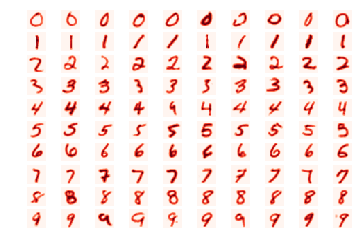

In [10]:
### STUDENT START ###



def P6():
    def gaussian_blur(input_data):
        ### this is a sub procedure to get input of a matrix of 28*28 and output a gaussian blurred matrix by averaging pixels
        ### with average of 8 surrounding pixels. 
        ### We do this by creating a small filter of size 2*2 that calculate the new center value by averaging the values from 
        ### the points on the border. Then we move this filter to all the surface of the bigger matrix
        ### in order to process points that are on the border, we'll padd zero values points to the bigger matrix
        
        ###Step 1: padding zero to make 30*30 matrix
        x_filterred = []
        x= input_data.reshape(-1,28,28)
        for i in range(0,x.shape[0]):
            zeros1 = np.zeros(28).reshape(1,28)
            zeros2 = np.zeros(30).reshape(30,1)
            x_padded=np.concatenate((x[i],zeros1), axis =0)
            x_padded=np.concatenate((zeros1,x_padded), axis =0)
            x_padded= np.concatenate((x_padded, zeros2), axis =1)
            x_padded= np.concatenate((zeros2,x_padded), axis =1)

            ###: Step 2, apply filter function

            for j in np.arange(1,29):
                    for k in np.arange(1,29):
                        x_filterred.append((x_padded[j+1,k]+x_padded[j-1,k]+x_padded[j,k-1]+x_padded[j,k+1]+
                                          x_padded[j+1,k+1]+x_padded[j-1,k-1]+x_padded[j+1,k-1]+x_padded[j-1,k+1])/8)
        return np.asarray(x_filterred) 
    ###now we display apply the filters on mini_train data and display examples of the processed data
    
    num_examples=10
    digit_list = np.unique(mini_train_labels)
    for i in digit_list:
        samples = gaussian_blur(mini_train_data[mini_train_labels==i]).reshape(-1,28,28)
        j =np.random.choice(samples.shape[0], size =num_examples, replace =False)
        X_img = samples[j]
        for k in range(0,num_examples):
            plt.subplot(10,num_examples,i*num_examples +k+1)
            plt.imshow(X_img[k], cmap='Reds')
            plt.axis('off')



    ###We do some experiment on applying this to training data, use processed data to build a model and see the prediction on
    ###on dev data using Knn with K =1
    ###1. Apply on mini train data but not on dev data
    processed_training = gaussian_blur(mini_train_data).reshape(-1,784)
    processed_dev = gaussian_blur(dev_data).reshape(-1,784)
    kn1 = KNeighborsClassifier(n_neighbors =1)
    kn2 = KNeighborsClassifier(n_neighbors =1)

    kn1.fit(processed_training, mini_train_labels)
    print('Accuracy for case 1: ',kn1.score(dev_data, dev_labels))

    
    kn2.fit(mini_train_data, mini_train_labels)
    print('Accuracy for case 2: ',kn2.score(processed_dev,dev_labels))

    print('Accuracy for case 3: ',kn1.score(processed_dev,dev_labels))

    print('Accuracy for case 4, without any filter: ',kn2.score(dev_data, dev_labels))


   

### STUDENT END ###

P6()

ANSWER:
Accuracy for case 1 (filter applied to training but not dev):  0.911
Accuracy for case 2 (filter applied to dev but not training) :  0.867
Accuracy for case 3 (filter applied to both training and dev):  0.903
Compared to the case without filter 0.8880, we see that appling filter to training data improve accuracy. This is because it generalizes the data in training process to reduce dependency on features specific to training data. Applying blurring is like regularization, it forces the model to learn features that can generalize to the population

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [12]:
def P7():
    def step_func(x):
        k=0
        if x>0.7:
            k= 2
        elif x>0.5:
            k= 1
        else:
            k=0
        return k



    vd_func = np.vectorize(step_func)
    

    
    nb = BernoulliNB(alpha =0.001, binarize =0.003)
    nb.fit(mini_train_data, mini_train_labels)
    print('Accuracy for bernoulii naiive bayes model : ',nb.score(dev_data,dev_labels))
   


    classified_data = vd_func(mini_train_data)


    mnb = MultinomialNB()
    mnb.fit(classified_data, mini_train_labels)
    dev_labels_pred_mnb = mnb.predict(dev_data)
    print('Accuracy for multinomial bayes model is:',mnb.score(dev_data,dev_labels))

    
    
P7()

Accuracy for bernoulii naiive bayes model :  0.814
Accuracy for multinomial bayes model is: 0.801


ANSWER: The multinomial model does not improve the result. This is because  digit recognition does not depends on a wide spectrum of colors. In fact, it's best to simply indicate that a pixel is filled or not. Giving more categories than needed for a value in pixel makes training algorithm learn features specific to training data and not neccessary features of the general model. Thus, it's understandable that Multinomial gives worse result than simple NB model.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [13]:
def P8(alphas):

    ### STUDENT START ###
    param_grid = alphas
    nb = BernoulliNB(binarize = 0.3)
    grid_search = GridSearchCV(nb, param_grid, cv=5)
    grid_search.fit(mini_train_data, mini_train_labels)
    print(grid_search.best_params_)
    model =grid_search.best_estimator_
    print(model)
    print('Accuracy for best  model on dev dataset: ',model.score(dev_data, dev_labels))
    nb_alpha0 = BernoulliNB(binarize = 0.3, alpha=0)
    nb_alpha0.fit(train_data, train_labels)
    print('Accuracy on dev dataset when alpha is 0',nb_alpha0.score(dev_data, dev_labels))    






    ### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}


P8(alphas)

/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


{'alpha': 0.01}
BernoulliNB(alpha=0.01, binarize=0.3, class_prior=None, fit_prior=True)
Accuracy for best  model on dev dataset:  0.822
Accuracy on dev dataset when alpha is 0 0.099


/Users/giang/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


ANSWER: The best value for alpha is 0.01.
When alpha is zero, the accuracy is down to less than 10% which is not what I expected

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [14]:
def P9():
### STUDENT START ###

    
    ##print(np.unique(process_data(mini_train_data)))
    gnb = GaussianNB()
    gnb.fit((mini_train_data), mini_train_labels)



    print('Accuracy on dev dataset of gaussian model is',gnb.score((dev_data), dev_labels))
    print('theta, mean of features per class',gnb.theta_)
    print('sigma, variance of features per class',gnb.sigma_)
   
    ### now we increase the sigma 
    gnb.sigma_+=0.008

    print('Accuracy on dev after sigma boosting: ',gnb.score((dev_data), dev_labels))







### STUDENT END ###

gnb = P9()

Accuracy on dev dataset of gaussian model is 0.621
theta, mean of features per class [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
sigma, variance of features per class [[  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 ..., 
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10

ANSWER: When we look at sigma there're so many zeros (Majority of them) due to many pixels in the images that are always zero (edges and and conners). This make the algorithm that rely on calculation of feature probability invalid because of zero division (https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes). This distorts the behavior of the algorithm and lead to in accuracy. So what I did is to add some small value to each blank pixel sigma to make them no longer zero. This improves the accuracy to nearly 80%

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

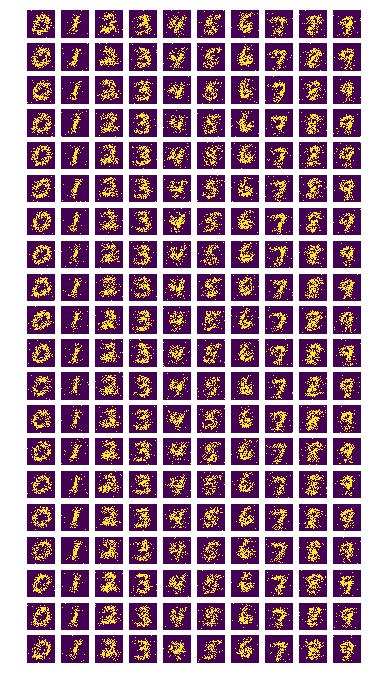

In [15]:
def P10(num_examples):
    plt.figure(figsize=(6,12))
### STUDENT START ###
    nb = BernoulliNB(binarize = 0.3)  
    nb.fit(mini_train_data, mini_train_labels)
    pixel_num = nb.feature_log_prob_.shape[1]
    pixel_probs = np.exp(nb.feature_log_prob_)
    for i in range(0,num_examples):
        generated_digits = np.zeros([10,pixel_num])
        for j in range(0,10):
            for k in range(0,pixel_num):
                generated_digits[j,k] = np.random.choice([0,1], p=[1-pixel_probs[j,k],pixel_probs[j,k]]) 
            plt.subplot(num_examples, 10, j+ 10*i+1)
            plt.imshow(generated_digits[j,:].reshape(28,28))
            plt.axis('off')
    
### STUDENT END ###

P10(20)

ANSWER: The generated digits can be recognizable though not very clear. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [16]:
def P11(buckets, correct, total):
    
    nb = BernoulliNB(alpha =0.01, binarize =0.3)
    nb.fit(mini_train_data, mini_train_labels)
    predict_probs = nb.predict_proba(dev_data)
    for i in range(predict_probs.shape[0]):
        pred_label, max_prob = np.argmax(predict_probs[i,:]), np.max(predict_probs[i,:])
        j=0
        for k,bucket in enumerate(buckets):
            j=k
            if(bucket>=max_prob):  
                break
            
        total[j]+=1
        if(pred_label == dev_labels[i]):
            correct[j]+=1
    print(correct)
### STUDENT START ###



                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

[1, 14, 30, 44, 35, 44, 50, 52, 552]
p(pred) <= 0.5000000000000    total =   2    accuracy = 0.500
p(pred) <= 0.9000000000000    total =  41    accuracy = 0.341
p(pred) <= 0.9990000000000    total =  75    accuracy = 0.400
p(pred) <= 0.9999900000000    total =  66    accuracy = 0.667
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.603
p(pred) <= 0.9999999990000    total =  62    accuracy = 0.710
p(pred) <= 0.9999999999900    total =  60    accuracy = 0.833
p(pred) <= 0.9999999999999    total =  62    accuracy = 0.839
p(pred) <= 1.0000000000000    total = 574    accuracy = 0.962


ANSWER: From the table we see that, even though the predicted probability is between 0.999 and 0.9999999999900, the accuracy is less than 80%. But anyway, the higher probability given, the more accurate the prediction is. This indicates that the model is weakly caliberated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
def P12():

### STUDENT START ###

 
   
### This is the beggining of transformation utility function. In general, the algorithm is to use recursive search to group 
### all pixels that are in the same region together. I apply a simple rule of friend network where If  i have friend, I ask him to find his friend, then he asks his find to find his friends..
###in the end, we have a pure connected friends group who share the certain characteristics, in this case blank pixels that can be connected
    
    def sum_transform(data):
        #This function process the whole input data, apply addiing sum of row and column as new features as well as 
        #count of number of regions
        data_length = data.shape[0]
        new_data = []
        for k in range(data_length):
            image = data[k]

            reshaped_image = image.reshape(28,28)

            no_regions = get_no_regions(reshaped_image)
            row_sum = np.sum(reshaped_image,axis =0)
            col_sum = np.sum(reshaped_image, axis=1)
            for j in range(len(image)):
                new_data.append(image[j])
            for j in range(len(row_sum)):
                new_data.append(row_sum[j])
            for j in range(len(col_sum)):
                new_data.append(col_sum[j])
            new_data.append(no_regions)
        return np.array(new_data).reshape(-1,841)
   
    def get_no_regions(image):
        #This function count of number of closed regions within each image 


        def extract_blank_point(blank_region, mixed_region):
            #this subfunction deletes all pixels of the same region out of the image given a zero pixel image as the 
            #starting point
            if((blank_region) in mixed_region)&(image[blank_region]==0):
                del mixed_region[blank_region]

            flag1, flag2, flag3, flag4 = False, False, False, False
            x = blank_region[0]
            y = blank_region[1]
            #here, we find direct neighoring pixels that are also blank
            xplus1 = x+1
            yplus1 = y+1
            xminus1 = x-1
            yminus1 = y-1

            if(xplus1<28):

                if((xplus1,y) in mixed_region)&(image[xplus1,y]==0):
                    del mixed_region[(xplus1,y)]
                    flag1= True 
                else:flag1 = False 
            else: flag1= False 


            if(yplus1<28):
                if((x,yplus1) in mixed_region)&(image[x,yplus1]==0):
                    del mixed_region[(x,yplus1)]
                    flag2 = True
                else:flag2 = False 
            else: flag2= False 


            if(yminus1>=0):
                if((x,yminus1) in mixed_region)&(image[x,yminus1]==0):
                    del mixed_region[(x,yminus1)]
                    flag3 = True
                else:flag3 = False 
            else: flag3= False 


            if(xminus1>=0):
                if((xminus1,y) in mixed_region)&(image[xminus1,y]==0):
                    del mixed_region[(xminus1,y)]
                    flag4 = True
                else:flag4 = False 
            else: flag4= False 

            #Use recursive to continue finding next neighboring pixels

            if flag1: extract_blank_point((xplus1,y), mixed_region)
            if flag2: extract_blank_point(((x,yplus1)), mixed_region)
            if flag3: extract_blank_point(((x,yminus1)), mixed_region)
            if flag4: extract_blank_point(((xminus1,y)), mixed_region)



        def get_initial_blank(region):
            #This function get the initial zero pixel in a region
            key = None
            for k,v in region.items():
                if v==0:
                    key = k
                    break 
            return key 


    #     print("begin procedure")
        regions = {(i,j): image[i,j] for (i,j) in [(i,j) for i in range(image.shape[0]) for j in range(image.shape[1])]}
        k =0
        mixed_region = regions
        while(len(mixed_region)>0):
            initial_blank = get_initial_blank(mixed_region)
            if (initial_blank ==None): break 
            size_before_extract = len(mixed_region)
            extract_blank_point(initial_blank, mixed_region)
            k= k+1
        return k-1


#### End of utility functions, start of main program

    nb = BernoulliNB(binarize =0.5)
    nb.fit(mini_train_data, mini_train_labels)
    print('Accuracy for bernoulii naiive bayes model before feature engineering is ',nb.score(dev_data,dev_labels))
    nb2 = BernoulliNB(binarize =0.5)
    sum_transform_train_data =sum_transform(mini_train_data)
    

    sum_transform_dev_data = sum_transform(dev_data)
    nb2.fit(sum_transform_train_data, mini_train_labels)
    print('Accuracy for bernoulii naiive bayes model after feature engineering 1 is ',nb2.score(sum_transform_dev_data,dev_labels))
   
### STUDENT END ###

P12()

Accuracy for bernoulii naiive bayes model before feature engineering is  0.815
Accuracy for bernoulii naiive bayes model after feature engineering 1 is  0.841


So we see small improvement of 2.6% when we add new features of sum of row values and sum of column values and count of closed regions within an image 